In [12]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=False)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 25, 
      'axes.titlesize': 25, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 18 
mpl.rcParams['ytick.labelsize'] = 18 
mpl.rcParams['legend.fontsize'] = 20 

In [13]:
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res.rename(columns={'logq-pqm1': 'neglogq-pqm1'}, inplace=True)
cat_type = pd.CategoricalDtype(categories=['I', 'II', 'III', 'IV', 'V', 'X'], ordered=True)
res['chromosome'] = res.chromosome.astype(cat_type)

cat_type = pd.CategoricalDtype(categories=['Not DE in pqm-1', 'DE in pqm-1', 'DE in all'], ordered=True)
res['Significance-pqm1'] = res['Significance-pqm1'].astype(cat_type)
res.sort_values(['Significance-pqm1', 'padj-50'], inplace=True)

In [23]:
res[res.externalgenename == 'pqm-1'][[c for c in res.columns if ('log2' in c) or ('padj' in c)]]

,log2FoldChange-50,padj-50,log2FoldChange-58,padj-58,log2FoldChange-pqm1,padj-pqm1
WBGene00004096,0.16615,0.042771,-0.037965,0.614881,-0.467671,2.218613e-10


In [14]:
(res['padj-pqm1'] < 0.05).sum()

8835

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange-pqm1', ylabel='neglogq-pqm1'>

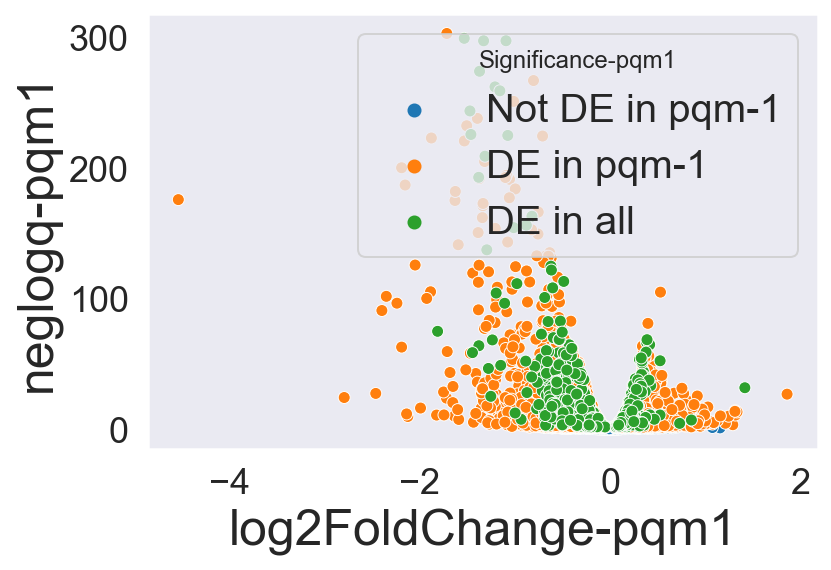

In [15]:
sns.scatterplot('log2FoldChange-pqm1', 'neglogq-pqm1', hue='Significance-pqm1', data=res)

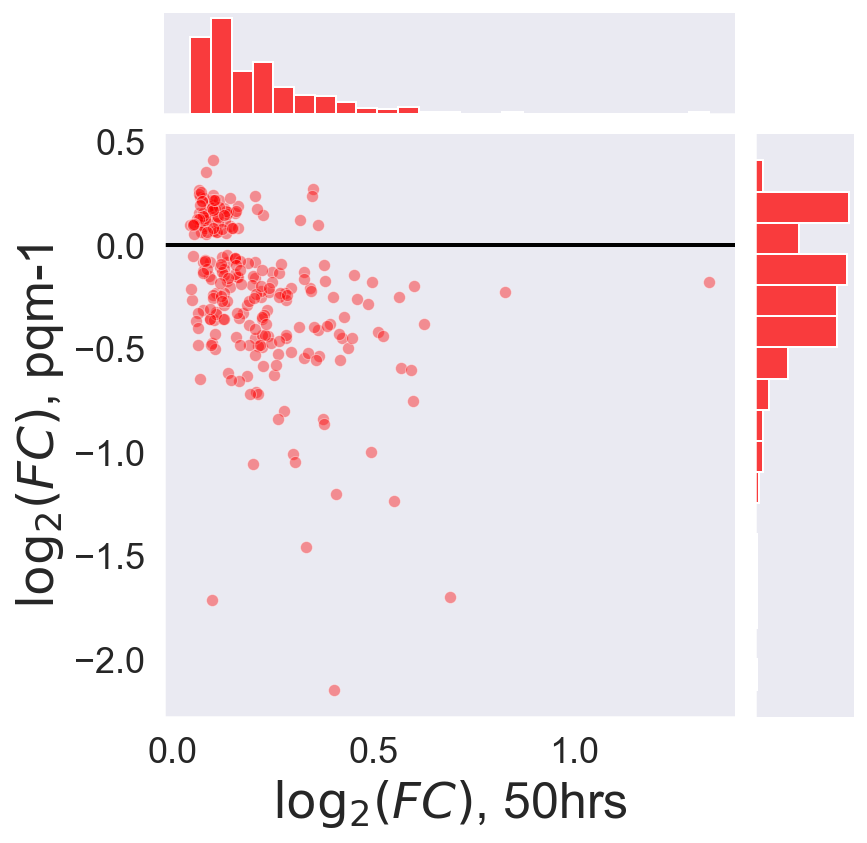

In [16]:
main_cond = (res['padj-50'] < 0.05) & (res['padj-pqm1'] < 0.05 )
pqm1_cond = (res.pqm1 == 'Y') & (res['log2FoldChange-50'] > 0)
g = sns.jointplot(x='log2FoldChange-50', y='log2FoldChange-pqm1', color='red',
                  data=res[main_cond & pqm1_cond], alpha=0.4)

g.ax_joint.axhline(0, color='black')
g.ax_joint.set_xlabel('$\log_2(FC)$, 50hrs')
g.ax_joint.set_ylabel('$\log_2(FC)$, pqm-1')
plt.savefig('../figs/pqm1-targets-comparison-50vspqm1.svg', bbox_inches='tight')

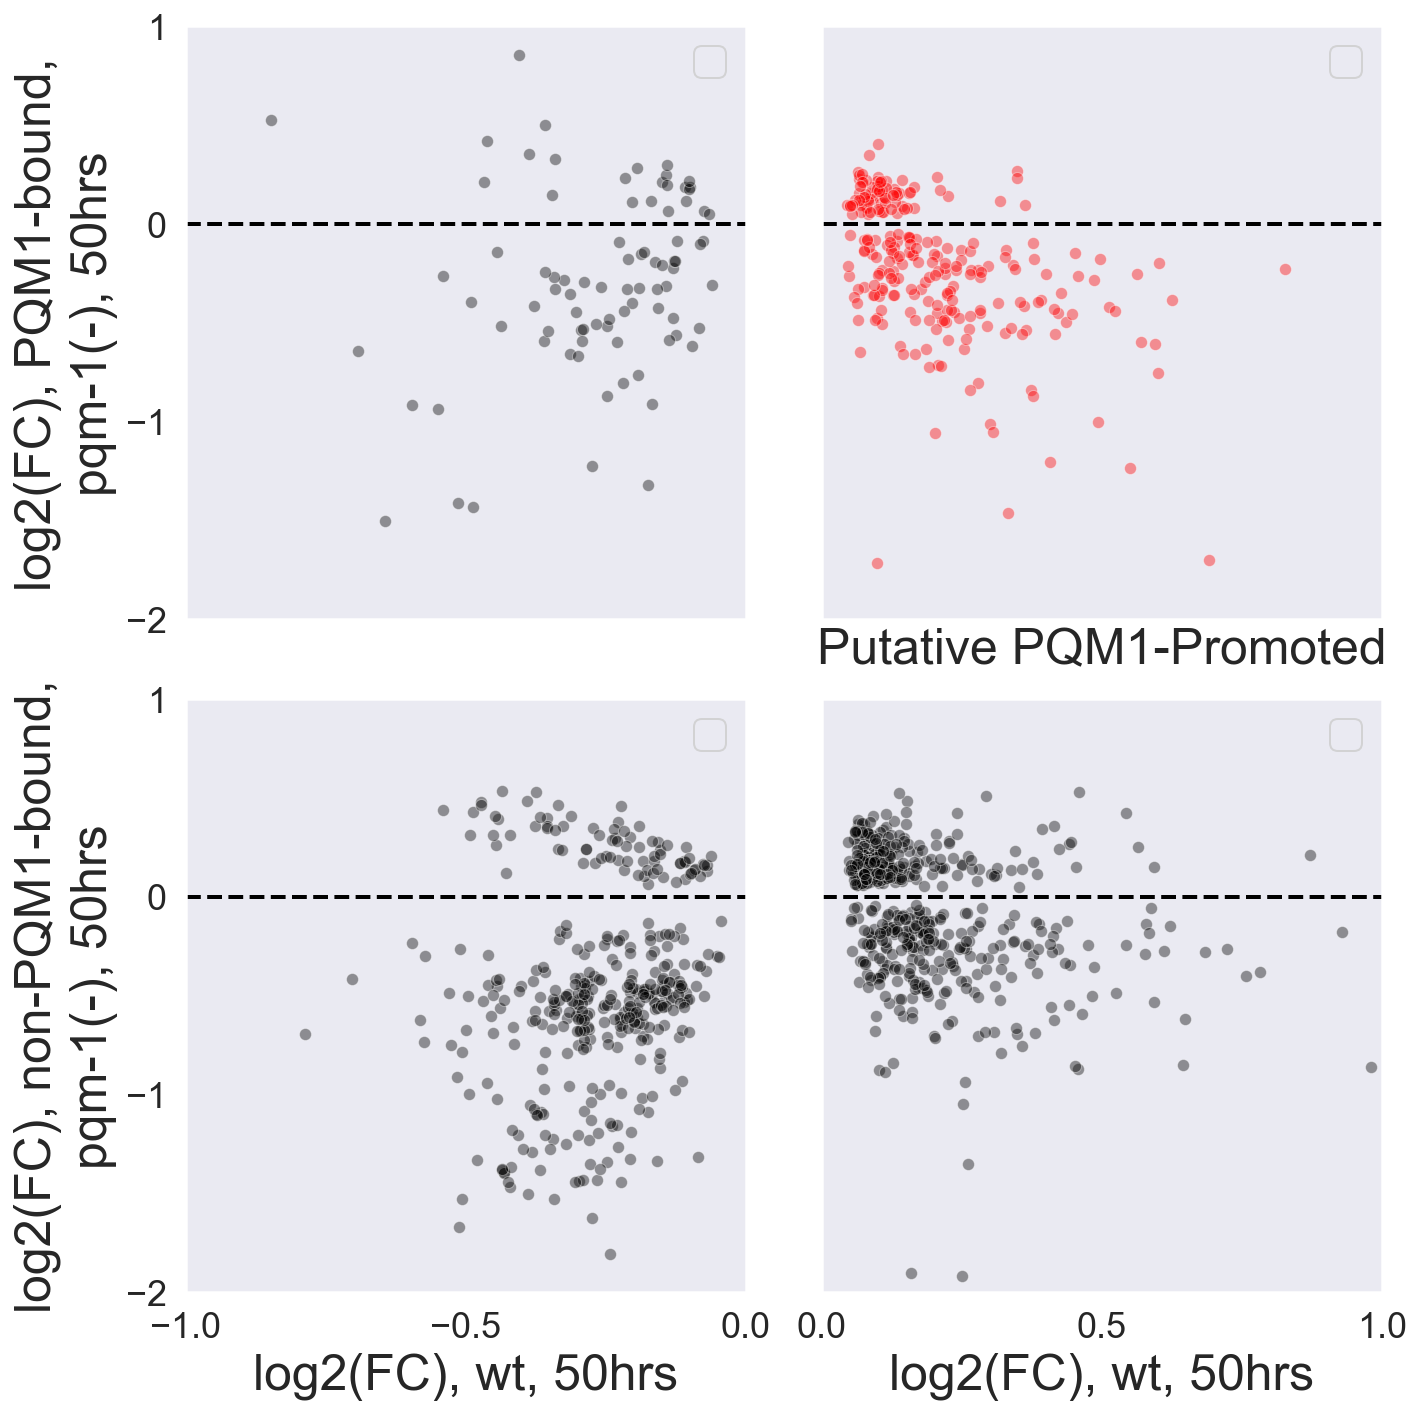

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

pqm1_cond = (res.pqm1 == 'Y') & (res['log2FoldChange-50'] > 0)
sns.scatterplot(x='log2FoldChange-50', y='log2FoldChange-pqm1', color='red',
                data=res[main_cond & pqm1_cond], alpha=0.4, ax=ax[0, 1])

pqm1_cond =  (res.pqm1 == 'Y') & (res['log2FoldChange-50'] < 0)
sns.scatterplot(x='log2FoldChange-50', y='log2FoldChange-pqm1', color='black',
                data=res[main_cond & pqm1_cond], alpha=0.4, ax=ax[0, 0])

pqm1_cond =  (res.pqm1 == 'N') & (res['log2FoldChange-50'] > 0)
sns.scatterplot(x='log2FoldChange-50', y='log2FoldChange-pqm1',  color='black',
                data=res[main_cond & pqm1_cond], alpha=0.4, ax=ax[1, 1])

pqm1_cond = (res.pqm1 == 'N') & (res['log2FoldChange-50'] < 0)
sns.scatterplot(x='log2FoldChange-50', y='log2FoldChange-pqm1',  color='black',
                data=res[main_cond & pqm1_cond], alpha=0.4, ax=ax[1, 0])

for axi in ax:
    for a in axi:
        a.axhline(0, color='black', ls='--')
        a.legend([])

ax[0, 0].set_xlim(-1, 0)
ax[1, 0].set_xlim(-1, 0)
ax[0, 1].set_xlim(0, 1)
ax[1, 1].set_xlim(0, 1)

ax[0, 0].set_ylim(-2, 1)
ax[0, 1].set_ylim(-2, 1)
ax[1, 0].set_ylim(-2, 1)
ax[1, 1].set_ylim(-2, 1)

ax[0, 0].set_xticks([])
ax[0, 1].set_xticks([])

ax[1, 0].set_xticks([-1, -.5, 0])
ax[1, 1].set_xticks([0, .5, 1])
ax[0, 0].set_yticks([-2, -1, 0, 1])
ax[0, 1].set_yticks([-2, -1, 0, 1])

ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')

ax[0, 0].set_ylabel('log2(FC), PQM1-bound,\npqm-1(-), 50hrs')
ax[1, 0].set_ylabel('log2(FC), non-PQM1-bound,\npqm-1(-), 50hrs')
ax[1, 0].set_xlabel('log2(FC), wt, 50hrs')
ax[1, 1].set_xlabel('log2(FC), wt, 50hrs')

ax[0, 1].set_xlabel('Putative PQM1-Promoted')

plt.tight_layout()